### Logisitc regression algorithm with Python 3

In this notebook, I attempt to build a logistic regression classification algorithm to classify the famous iris dataset.  

#### Linear Regression 
Before talking about logisitc regression, lets start with linear regression. 
Given a bunch of X and Y, linear regression algorithm will try to find a best fit line/ function
that maps X to Y.

<img src="regression.png">

Finding the best fit line or best mapping function is an optimization problem. The process of optimizing is known as **training**.
For only 1 input feature, the mapping function would be in the form of : y = mx + c as learnt in school where m is the gradient 
and c is the y-intercept.
 
The steps:
1. First, the parameters, m and c, are randomly initialized to some numbers.

2. Then, the predicted output is calculated by plugging in the initialized parameters.

3. There is a difference/ error (Green lines in the left plot) between predicted output (best fit line) and real output (the points on the plot). There is a *loss function* to calculate total loss over all the predictions. 

<img src="LR.png">

4. The top right plot is a plot of loss function vs. parameters of the mapping function. It can be visualized as a bowl-shaped curve (convex). The objective of training is to minimize the total errors. In other words, we want get to the bottom of the bowl (Combinations of parameters (m and c or w and b) with smallest total error.

5. To get to the bottom of the bowl, we have to take baby steps as depicted by the red arrows on the plot to the right. If the steps are too large, we may never reach the bottom of the bowl.

6. We take small step by using **gradient descent**. In every iteration of training, we compute the gradient of the error function (red line) and add the changes to our parameters to move down towards bottom of the bowl.

Note that, the X and Y for regression is continuous.


####  What is classification?
On the other hand, for classification, Y is discrete. Classification is an attempt to determine what "class" (Y) given one or more than one input variables (features), X. 


Features are variables that describe the different class in some way. For iris dataset, the features are sepal length, sepal width, petal length and petal width. Given enough labelled examples (X,Y),  learning algorithms such as logistic regression would eventually learn a function mapping from the features,X to iris plant species classes,Y.

Example of classification problem:
* Is an email spam or not spam ?
* Is this a picture of a puppy or a kitten ?
* Is a tumor benign or malignant ? 

Binary classification has two classes (0 and 1). Whereas, multiclass classification has more than 2 classes. 
Multiclass is just an extension of binary classification problem.

**Problem with using linear regression for classification:**
1. Linear regression's predicted output can be values larger than 1 or smaller than 0
2. The decision boundary is not linear for all dataset

So, for logistic regression, we would want to limit the output between 0 and 1. How can it be done?

__Hypothesis representation :__
The following is the hypothesis representation of logistic regression where:
* X is input
* W is weights
* b is bias
* Y_hat is output
* sigma(Z) is the sigmoid function
* n is the number of feature
* m is the number of training examples

<img src="formulas.png">

__sigmoid function :__

The output can be limited to a range of (0,1) by applying a logistic or sigmoid function

<img src="sigmoid.png">

##### What does the output mean? 
One way to interpret it is thinking of it as the estimated probability of
Y = 1 given some input X, parameterized by weights and bias, P(Y=1 | x; parameters). 

###### How to interpret the sigmoid plot?
Sigmoid(Z) is greater than or equal to 0.5 when Z is greater than or equal to 0.
Sigmoid(Z) is less than 0.5 when Z is less than 0.

Therefore, if sigmoid output is larger than or equal to 0.5, Y_hat predicts class 1.
On the other hand, if sigmoid output is lesser than 0.5, Y_hat predicts class 0.


#### Loss and gradient descent

The loss function in terms of parameters for linear regression is bowl-shaped or __convex__.
When same loss function is used, the bowl-shape is distorted as a sigmoid function is applied.
This results in a ugly 'bowl' with many local minima unlike in the case of linear regression, where we have a perfect bowl with a global minimum.

Therefore, the error function can be redefined as follow:

<img src="LogisticR.png">


Now, it's a bowl again!

#### Multiclass Logistic Regression

<img src="multiclass.png">


The image show a 3-class classification problem. Multiclass classification can be achieved by applying one-vs-all classification. This means we split it into 3 binary classification problem. Make one of the class as 1 and others as class 0 (Blackened in image), repeat this to other class.

Now, there are 3 predicted outputs, Y_hat1, Y_hat2 and Yhat3:
The training step is the same, we train *y_hat_i* for each class to predict probability y = i (class).
Pick the class i that have the largest y_hat_i for classification.

### Step 1:  Loading packages
Load python packages and split the data into training and testing sets.

In [8]:
import numpy as np  # for matrix operations
import pandas as pd  # Data handling
import matplotlib.pyplot as plt   # Data visualization

Loads iris dataset and split it into training set and testing set

In [9]:
# Want to be able to same generate random numbers 
np.random.seed(0)
# Read data from text file
df = pd.read_csv('iris.data.txt', names = [
                                            'Sepal length','Sepal width',
                                            'Petal length','Petal width',
                                            'Class'            
                                          ])
# Shuffle data
df = df.reindex(np.random.permutation(df.index))
# Test set (20%)
tf = df[120:].copy()
# Training set (80%)
df = df[:120].copy()
df

,Sepal length,Sepal width,Petal length,Petal width,Class
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


### Step 2: Splitting multiclass problem into 3 binary classificiation problems
The dataset consists of 3 classes. I am going to use One-versus-all method classification.

The training set is split into 3 seperate binary classification problem

In [10]:
# This function is to split the training set
def split_data_to_binary(dataFrame, class_name):
    ''' Split training set into binary dataset
        Label 1 for type of iris name we want to classify
        Label 0  for the rest
        
        Arguments:
            dataFrame: Training set
            class_name: The iris name/ class name
        Return:
            splitFrame: splitted dataFrame
    '''
    splitFrame = dataFrame.copy()
    splitFrame.reset_index(inplace=True)
    splitFrame.drop('index',axis=1,inplace=True)
    label = []
    for c in splitFrame['Class']:
        if c == class_name:
            label.append(1)
        else: 
            label.append(0)
    splitFrame['label'] = pd.Series(label)
    return splitFrame
# Test the splitting function on training set
binary_problem_1_dataset = split_data_to_binary(df,'Iris-setosa')
binary_problem_2_dataset = split_data_to_binary(df,'Iris-virginica')
binary_problem_3_dataset = split_data_to_binary(df,'Iris-versicolor')
binary_problem_1_dataset 

,Sepal length,Sepal width,Petal length,Petal width,Class,label
0,5.8,2.8,5.1,2.4,Iris-virginica,0
1,6.0,2.2,4.0,1.0,Iris-versicolor,0
2,5.5,4.2,1.4,0.2,Iris-setosa,1
3,7.3,2.9,6.3,1.8,Iris-virginica,0
4,5.0,3.4,1.5,0.2,Iris-setosa,1
5,6.3,3.3,6.0,2.5,Iris-virginica,0
6,5.0,3.5,1.3,0.3,Iris-setosa,1
7,6.7,3.1,4.7,1.5,Iris-versicolor,0
8,6.8,2.8,4.8,1.4,Iris-versicolor,0
9,6.1,2.8,4.0,1.3,Iris-versicolor,0


### Step 3: Building logistic regression model

Logistic regression model for binary classification problem

Accuracy : 1.0


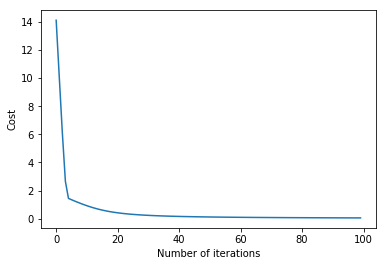

In [11]:
# This is a sigmoid function
def sigmoid(parameters,X):
    '''This is a sigmoid/ logistic function
    Arguments:
        parameters : Weights and bias, shape : (1,number_of_features+1)
        X          : Input data, shape : (number_of_features,number_of_training_examples)
    Return:
        sigmoid-ed stuff
    '''
    weights = parameters[:,1:]
    bias = parameters[:,0]
    stuff = np.dot(weights,X) + bias
    return 1/(1 + np.exp(-stuff))

# Compute output prediction
def forward_computation(parameters,X):
    '''To compute y_hat
    Arguments:
        parameters : Weights and bias, shape : (1,number_of_features+1)
        X          : Input data, shape : (number_of_features,number_of_training_examples)

    Return:
        Y_hat : shape: (1, number_of_training_examples)
    '''
    Y_hat = sigmoid(parameters,X)
    return Y_hat

# Compute error/ loss/ cost
def cost_function(Y_hat,Y):
    '''Compute cost
        Y_hat : Output of Logistic Regression
        Y : Labels
    Return:
        cost : computed cost
    '''
    m = Y.shape[1]
    cost = sum(sum(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))
    cost = -1/m*cost
    
    return cost

# This function is to perform gradient descent and update the weights and biases
def update_parameters(X,Y,Y_hat,parameters,learning_rate):
    
    weights = parameters[:,1:] # (1,n)
    bias = parameters[:,0] # (1,1)
    stuff = np.dot((Y_hat-Y),X.T) # (1,n)
    weights = weights - learning_rate*stuff
    bias = bias - learning_rate*sum(sum(Y_hat-Y)) # (1,1)
    bias = bias.reshape(1,-1)
    parameters = np.concatenate([bias,weights],axis=1)
    return parameters

# Calculate training accuracy
def score(Y_hat,Y):
    # This function is to calculate the training accuracy
    predictions = (Y_hat > 0.5)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y, 1-predictions.T))/Y.size)
    return accuracy

# Combine all stuffs together
def logistic_regression_model(X,Y,num_epoch,learning_rate):
    # Combine all functions
    np.random.seed(0)
    parameters = np.random.randn(1,(X.shape[0]+1))
    costs = []
    Y_hat = np.zeros(Y.shape)
    for i in range(num_epoch):
        Y_hat = forward_computation(parameters,X)
        cost = cost_function(Y_hat,Y)
        costs.append(cost)
        parameters = update_parameters(X,Y,Y_hat,parameters,learning_rate)
        #print('Epoch '+ str(i) +', Loss: '+ str(cost))
    return Y_hat,costs,parameters    

# This part is to test the logistic_regression_model function and more
X = np.array(binary_problem_1_dataset.drop(['Class','label'], axis = 1)).T
Y = np.array(binary_problem_1_dataset['label']).reshape(1,-1)
Y_hat,costs,param = logistic_regression_model(X,Y,100,0.001)
accuracy = score(Y_hat,Y)
print('Accuracy :',accuracy)

plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.show()

### Step 4: Training individual binary classification problem

Here, we train all 3 separated classifiers on training set

Accuracy : 1.0


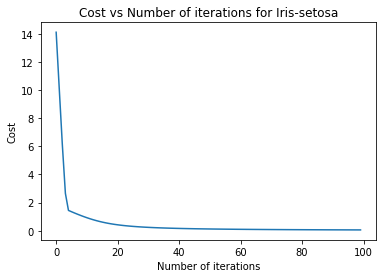

Accuracy : 0.9583333333333334


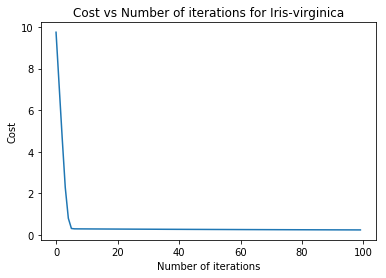

Accuracy : 0.7


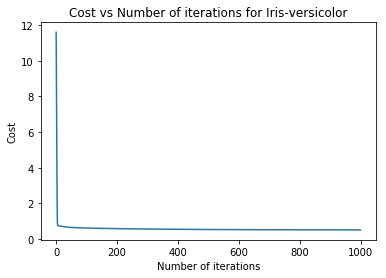

[array([[ 1.80637504, -0.64016592,  1.71181725, -1.44076069,  0.27295401]]),
 array([[ 1.22202323, -1.77066854, -0.44670177,  1.65000442,  1.93050611]]),
 array([[ 2.26217088,  0.29269199, -1.79134361,  0.60001837, -1.3807681 ]])]

In [12]:
# This function is to perform training
def train_binary(dataFrame, iris, learning_rate, num_epochs):
    X = np.array(dataFrame.drop(['Class','label'], axis = 1)).T
    Y = np.array(dataFrame['label']).reshape(1,-1)

    Y_hat,costs,parameters = logistic_regression_model(X,Y,num_epochs,learning_rate)
    accuracy = score(Y_hat,Y)
    print('Accuracy :',accuracy)
              
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Number of iterations')
    plt.title('Cost vs Number of iterations for '+iris)
    plt.show()
    return parameters
# We would want to save the trained weights and bias so later we can use it to predict on un-seen data
parameters = []
iris_name = ['Iris-setosa','Iris-virginica','Iris-versicolor']
parameters.append(train_binary(split_data_to_binary(df,iris_name[0]),iris_name[0],0.001,100))
parameters.append(train_binary(split_data_to_binary(df,iris_name[1]),iris_name[1],0.001,100))
parameters.append(train_binary(split_data_to_binary(df,iris_name[2]),iris_name[2],0.001,1000))
parameters

Well, the third classifier's training accuracy doesn't seem very impressive :P

### Step 5: Validate the model on test set
Here, we predict on un-seen data by picking the class *i* with largest probability

In [13]:
# This function is for classifying each binary problem of test set
def test_binary(dataFrame, parameters):
    X = np.array(dataFrame.drop(['Class','label'], axis = 1)).T
    Y = np.array(dataFrame['label']).reshape(1,-1)
    Y_hat = forward_computation(parameters,X)          
    return Y_hat


binary_problem_1_dataset = split_data_to_binary(tf,'Iris-setosa')
binary_problem_2_dataset = split_data_to_binary(tf,'Iris-virginica')
binary_problem_3_dataset = split_data_to_binary(tf,'Iris-versicolor')

# Compute predictions for each binary problem
# prediction can also be interpreted as probability
Y_hats = test_binary(binary_problem_1_dataset,parameters[0])
Y_hats = np.concatenate([Y_hats,(test_binary(binary_problem_2_dataset,parameters[1]))],axis=0)
Y_hats = np.concatenate([Y_hats,(test_binary(binary_problem_3_dataset,parameters[2]))],axis=0)
print('Y_hats shape :',Y_hats.shape)

# Use one-vs-all classification: 
# Find class i that maximizes the probability
predictions = np.argmax(Y_hats,axis=0)
tf.reset_index(inplace=True)
tf.drop('index',axis=1,inplace=True)
predicted_Class = []
for i in predictions:
    if i == 0:
        predicted_Class.append('Iris-setosa')
    elif i == 1:
        predicted_Class.append('Iris-virginica')
    elif i == 2:
        predicted_Class.append('Iris-versicolor')
# Compute accuracy on test set
tf['predicted class'] = pd.Series(predicted_Class)
pf = tf[tf['Class'] == tf['predicted class']]
test_accuracy = len(pf)/len(tf)*100
print('Test accuracy: ',test_accuracy)
print('Misclassified: ',len(tf)-len(pf))

Y_hats shape : (3, 30)
Test accuracy:  90.0
Misclassified:  3


Yay, 90 %. Pretty awesome

#### References:
    
1.http://www.holehouse.org/mlclass/06_Logistic_Regression.html

2.https://github.com/mbadry1/DeepLearning.ai-Summary/tree/master/1-%20Neural%20Networks%20and%20Deep%20Learning